In [2]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

on générer les données  à l'aide de make_blobs(), une fonction pratique de scikit-learn utilisée pour générer des clusters synthétiques. 

make_blobs()utilise ces paramètres :

- n_samples est le nombre total d'échantillons à générer.
- centers est le nombre de centres à générer.
- cluster_std est l'écart type.

make_blobs() renvoie un tuple de deux valeurs :

- Un tableau NumPy à deux dimensions avec les valeurs x et y pour chacun des échantillons
- Un tableau NumPy à une dimension contenant les étiquettes de cluster pour chaque échantillon 

In [3]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [4]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

Les ensembles de données contiennent généralement des caractéristiques numériques qui ont été mesurées dans différentes unités, telles que la taille (en pouces) et le poids (en livres). Un algorithme d'apprentissage automatique considérerait le poids comme plus important que la taille uniquement parce que les valeurs de poids sont plus grandes et présentent une plus grande variabilité d'une personne à l'autre.

Les algorithmes d'apprentissage automatique doivent prendre en compte toutes les fonctionnalités sur un pied d'égalité. Cela signifie que les valeurs de toutes les caractéristiques doivent être transformées à la même échelle.

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

La classe  d'estimateur KMeans dans scikit-learn est l'endroit où on défini les paramètres de l'algorithme avant d'adapter l'estimateur aux données. L'implémentation scikit-learn est flexible, fournissant plusieurs paramètres qui peuvent être ajustés.

Voici les paramètres utilisés dans cet exemple :

init contrôle la technique d'initialisation. La version standard de l' algorithme k- means est implémentée en définissant initsur "random". 

n_clusters définit k pour l'étape de regroupement. C'est le paramètre le plus important pour k -means.

n_init définit le nombre d'initialisations à effectuer. Ceci est important car deux exécutions peuvent converger vers des affectations de cluster différentes. Le comportement par défaut de l'algorithme scikit-learn consiste à effectuer dix exécutions à k- moyennes et à renvoyer les résultats de celui avec le SSE le plus bas.

max_iter définit le nombre d'itérations maximum pour chaque initialisation de l' algorithme k- means.

In [7]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [8]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [10]:
# The lowest SSE value
kmeans.inertia_

74.57960106819853

In [11]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [12]:
# The number of iterations required to converge
kmeans.n_iter_

2

Enfin, les affectations de cluster sont stockées sous forme de tableau NumPy unidimensionnel dans kmeans.labels_. Voici un aperçu des cinq premières étiquettes prédites :

In [13]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

<h3>méthodes couramment utilisées pour évaluer le nombre approprié de clusters :</h3>

- La méthode du coude
- Le coefficient de silhouette

Celles-ci sont souvent utilisées comme techniques d'évaluation complémentaires plutôt que préférées l'une à l'autre. Pour effectuer la méthode du coude , exécutez plusieurs k- means, incrémentez kà chaque itération et enregistrez le SSE :

In [14]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


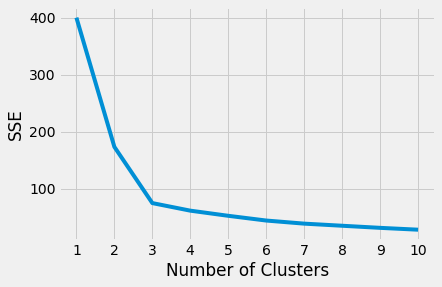

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Le coefficient de silhouette est une mesure de la cohésion et de la séparation des clusters. Il quantifie dans quelle mesure un point de données s'intègre dans son cluster attribué en fonction de deux facteurs :

- À quel point le point de données est-il proche des autres points du cluster
- À quelle distance se trouve le point de données des points d'autres clusters

In [17]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

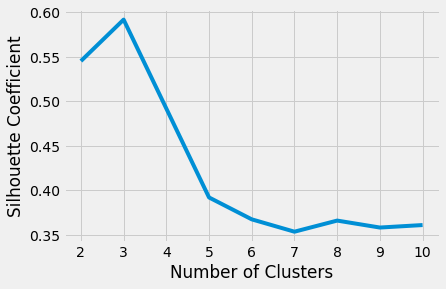

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

<h2>Évaluation des performances de clustering à l'aide de techniques avancées

Lorsque l'on compare les k- moyennes à une approche basée sur la densité sur des amas non sphériques, les résultats de la méthode du coude et du coefficient de silhouette correspondent rarement à l'intuition humaine.

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [20]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [21]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [22]:
kmeans_silhouette

0.5

In [23]:
dbscan_silhouette

0.38

Le coefficient de silhouette est plus élevé pour l' algorithme des k- moyennes. L'algorithme DBSCAN semble trouver des clusters plus naturels en fonction de la forme des données 

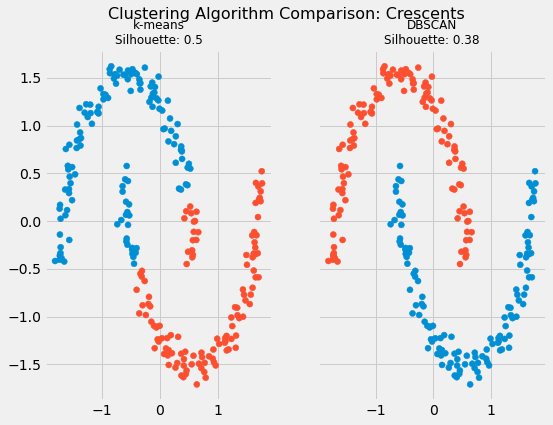

In [24]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

Vous pouvez utiliser l' implémentation scikit-learn d'une métrique commune appelée l' indice de rand ajusté (ARI) . Contrairement au coefficient de silhouette, l'ARI utilise de vraies affectations de grappes pour mesurer la similitude entre les étiquettes vraies et prédites.

Comparez les résultats de clustering de DBSCAN et k- means en utilisant ARI comme mesure de performance :



In [25]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)



In [26]:
round(ari_kmeans, 2)


0.47

In [27]:
round(ari_dbscan, 2)

1.0